In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Images

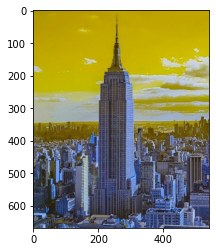

In [2]:
# Read an image

image_path = r"C:\Users\user\Pictures\esb.jpg"
img = cv2.imread(image_path)

# Show image with matplotlib:
plt.imshow(img, cmap='gray')                                           
plt.show()  

# Show image with cv2:
#cv2.imshow("Image", img)                           # "Output": name of the frame
#cv2.waitKey(1)                                     # delay; in milliseconds

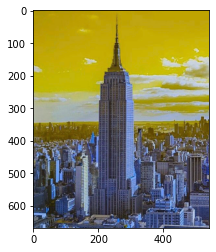

In [3]:
# Color Spaces

# BGR to Grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# BGR to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# BGR to lab
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# BGR to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# HSV to BGR
hsv_bgr = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2BGR)

# lab to BGR
lab_bgr = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)

#cv2.imshow("Image", hsv_img)
#cv2.waitKey(0) 

plt.imshow(lab_bgr)
plt.show()  

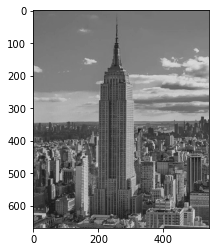

In [4]:
# Convert image to grayscale

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Gray Image", gray_img)
#cv2.waitKey(0)
#cv2.imwrite(r"C:\Users\user\Pictures\b.jpg", canny_img)        # save as a new picture

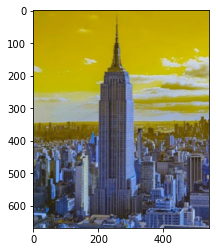

In [5]:
# Blur the image

blur_img = cv2.GaussianBlur(img, (5,5), 1)           # (5,5): kernel size; 1: sigmaX

plt.imshow(blur_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Blur Image", blur_img)                   # or gray_img
#cv2.waitKey(0)

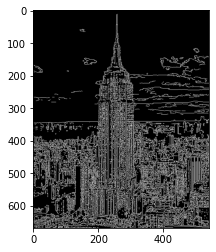

In [6]:
# Canny the image (showing the edges)

canny_img = cv2.Canny(img, 150, 200)                 # 150, 200: thresholds

plt.imshow(canny_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Canny Image", canny_img)                 
#cv2.waitKey(0)

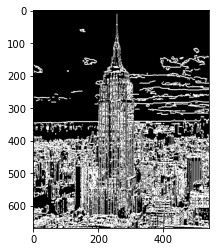

In [7]:
# Dilate edges of canny_img

kernel = np.ones((3,1), np.uint8)                               # 3x1 matrix full of ones (-> white)
dilate_img = cv2.dilate(canny_img, kernel, iterations=1)

plt.imshow(dilate_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Dialation Image", dilate_img)                 
#cv2.waitKey(0)

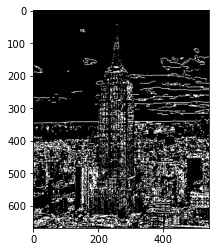

In [8]:
# Eroding the image

kernel = np.ones((2,2), np.uint8)                               # 2x2 matrix full of ones
erode_img = cv2.erode(dilate_img, kernel, iterations=1)

plt.imshow(erode_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Eroded Image", erode_img)                 
#cv2.waitKey(0)

Image shape:	(669, 540, 3)



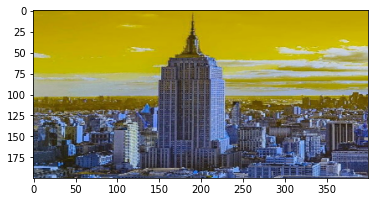

In [9]:
# Resize the image

print("Image shape:\t" + str(img.shape))            # (height, width, channels)
resized_img = cv2.resize(img, (400, 200))           # (width, height)

print()
plt.imshow(resized_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Resized Image", resized_img)
#cv2.waitKey(0)

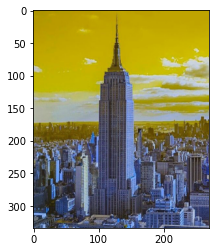

In [10]:
# Rescale the image

def rescale(frame, scale=0.5):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width, height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)

new_image = rescale(img)

plt.imshow(new_image, cmap='gray')                                           
plt.show()  

#cv2.imshow("Resized Image", new_image)
#cv2.waitKey(0)

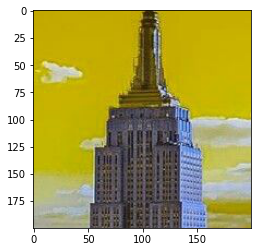

In [11]:
# Cropping the image
 
cropped_img = img[100:300, 150:350]                   # [height, width]

plt.imshow(cropped_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Cropped Image", cropped_img)
#cv2.waitKey(0)

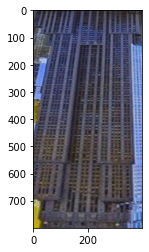

In [12]:
# Warp perspective

img = cv2.imread(r"C:\Users\user\Pictures\esb.jpg")
width = 400
height = 800

points = np.float32([[170,622], [300, 626], [215,191], [290,192]])     # Pixel values of the object in the picture
                                                                       # use Paint to get the exact values
points1 = np.float32([[0,0], [width, 0], [0,height], [width, height]]) 

matrix = cv2.getPerspectiveTransform(points, points1)
output = cv2.warpPerspective(img, matrix, (width, height))     

plt.imshow(output, cmap='gray')                                           
plt.show()  

#cv2.imshow("Output", output)                           
#cv2.waitKey(0)   

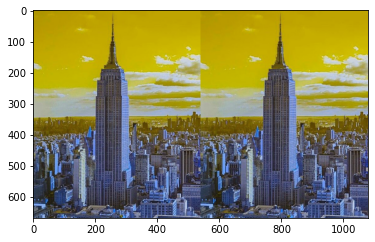

In [13]:
# Joining images

horizontal_img = np.hstack((img, img))
# vertical_img = np.vstack((img, img))

plt.imshow(horizontal_img, cmap='gray')                                           
plt.show()  

#cv2.imshow("Output", horizontal_img)    
#cv2.waitKey(0) 

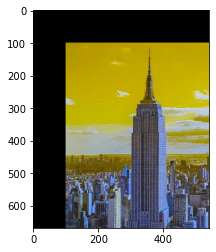

In [14]:
# Image Translation

def translate(img, x, y):                                 # x, y: pixel value to shift the image on x and y axis
    matrix = np.float32([[1,0,x], [0,1,y]])
    dimensions = (img.shape[1], img.shape[0])             # 0: height, 1: width
    return cv2.warpAffine(img, matrix, dimensions)


# -x: Left; -y: Up, x: Right, y: Down

img_translated = translate(img, 100, 100)

plt.imshow(img_translated, cmap='gray')                                           
plt.show()  

#cv2.imshow("Translated Image", img_translated)
#cv2.waitKey(0)

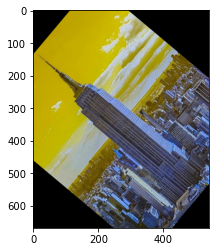

In [15]:
# Image Rotation

def rotate(img, angle, rotationPoint=None):
    (height, width) = img.shape[:2]
    if rotationPoint is None:
        rotationPoint = (width//2, height//2)
    matrix = cv2.getRotationMatrix2D(rotationPoint, angle, 1.0)
    dimensions = (width, height)
    
    return cv2.warpAffine(img, matrix, dimensions)


img_rotated = rotate(img, 50)                 # -angle is also possible (clockwise)

#cv2.getRotationMatrix2D(center, angle, scale)
#cv2.imshow("Rotated Image", img_rotated)
#cv2.waitKey(0)

plt.imshow(img_rotated, cmap='gray')                                           
plt.show()  

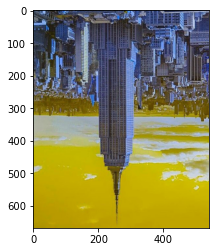

In [16]:
# Flipping

img_flip = cv2.flip(img, 0)

#cv2.flip(src, flipCode, dst=None)
# flipCode: 0 -> vertical, over x axis; 1 -> horizontal, over y axis; -1 -> vertical and horizontal

#cv2.imshow("Translated Image", img_translated)
#cv2.waitKey(0)

plt.imshow(img_flip, cmap='gray')                                           
plt.show()  

(669, 540, 3)
(669, 540)
(669, 540)
(669, 540)


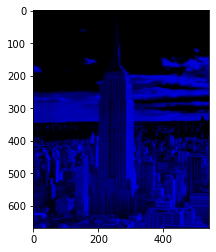

In [17]:
# Split an image to its color channels

img = cv2.imread(r"C:\Users\user\Pictures\esb.jpg")

b, g, r = cv2.split(img)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

#cv2.imshow("Blue image", b)
#cv2.imshow("Green image", g)
#cv2.imshow("Red image", r)
#cv2.waitKey(0) 


merged_img = cv2.merge([b,g,r])
#cv2.imshow("Merged image", merged_img)


blank = np.zeros(img.shape[:2], dtype='uint8')
blue_img = cv2.merge([b, blank, blank])
green_img = cv2.merge([blank, g, blank])
red_img = cv2.merge([blank, blank, r])

#cv2.imshow("Merged blue image", blue_img)


plt.imshow(red_img)              # in matplotlib red_img equals blue (due to RGB vs BGR)
plt.show()  

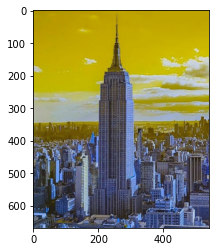

In [18]:
# Blurring Techniques

# Averaging
avg = cv2.blur(img, (5,5))               # average of pixels 

# Gaussian Blur
gauss = cv2.GaussianBlur(img, (5,5), 0)

# Median Blur
med = cv2.medianBlur(img, 5)            #ksize: 5,5

# Bilateral
bil = cv2.bilateralFilter(img, 5, 15, 15)

#cv2.imshow("Average blur", avg)
#cv2.waitKey(0)

plt.imshow(bil)            
plt.show()  

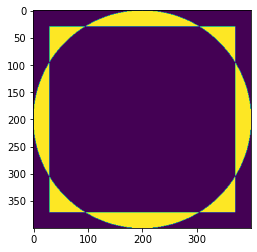

In [19]:
# Bitwise Operations

blank = np.zeros((400,400), dtype='uint8')
rectangle = cv2.rectangle(blank.copy(), (30,30), (370, 370), 255, -1)
circle = cv2.circle(blank.copy(), (200,200), 200, 255, -1)

# bitwise AND -> intersecting regions
bitwise_and = cv2.bitwise_and(rectangle, circle)          

# bitwise OR -> non-intersecting and intersecting regions
bitwise_or = cv2.bitwise_or(rectangle, circle)

# bitwise XOR -> non-intersecting regions
bitwise_xor = cv2.bitwise_xor(rectangle, circle)

# bitwise NOT
bitwise_not = cv2.bitwise_not(rectangle)

#cv2.imshow("bitwise xor", bitwise_xor)
#cv2.waitKey(0)

plt.imshow(bitwise_xor)            
plt.show()  

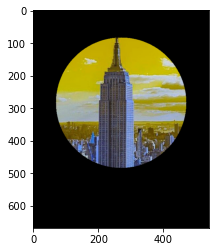

In [20]:
# Masking

blank = np.zeros(img.shape[:2], dtype='uint8')    
# dimensions of the mask have to be of the same size as that of the image 

mask = cv2.circle(blank, (img.shape[1]//2, img.shape[0]//2-50), 200, 255, -1)      # or rectangle
masked_img = cv2.bitwise_and(img, img, mask=mask)

#cv2.imshow("Masked Image", masked_img)
#cv2.waitKey(0)

plt.imshow(masked_img)            
plt.show()  

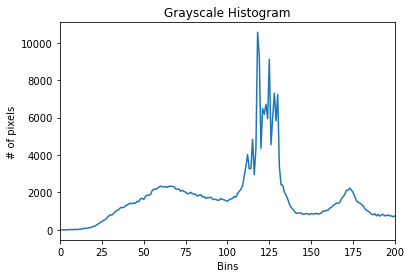

In [21]:
# Compute Histograms (visualize the distribution of pixel intensities in an image)

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_histogram = cv2.calcHist([gray_img], [0], None, [256], [0,256])          # instead of None you can set mask

masked_img = cv2.bitwise_and(gray_img, gray_img, mask=mask)
gray_histogram1 = cv2.calcHist([gray_img], [0], masked_img, [256], [0,256]) 

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_histogram)
plt.xlim([0, 200])
plt.show()

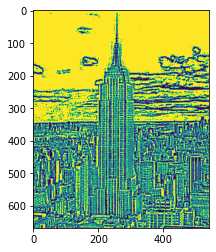

In [23]:
# Thesholding (binarization of an image)


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Simple Thresholding
threshold, thresh = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)      # > 150 then 255, otherwise 0

threshold, thresh_inv = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY_INV) 


# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)


#cv2.imshow("Thresholded", thresh)
#cv2.imshow("Adaptive Thresholding", adaptive_thresh)
#cv2.waitKey(0)


plt.imshow(adaptive_thresh)            
plt.show()  

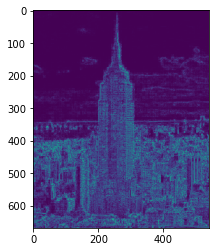

In [22]:
# Edge Detection

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Laplacian
lap = cv2.Laplacian(gray_img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))


# Sobel
sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1)
combine = cv2.bitwise_or(sobelx, sobely)


#cv2.imshow("Laplacian", lap)
#cv2.imshow("Sobel X", sobelx)
#cv2.waitKey(0)

plt.imshow(lap)            
plt.show()  

In [ ]:
# Color detection

def empty(a):
    pass


# Define trackbars
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars", 640, 240)
cv2.createTrackbar("Hue Min", "TrackBars", 0, 179, empty)           # 0: initial value; 179: count
cv2.createTrackbar("Hue Max", "TrackBars", 179, 179, empty) 
cv2.createTrackbar("Sat Min", "TrackBars", 0, 255, empty) 
cv2.createTrackbar("Sat Max", "TrackBars", 255, 255, empty) 
cv2.createTrackbar("Val Min", "TrackBars", 0, 255, empty) 
cv2.createTrackbar("Val Max", "TrackBars", 255, 255, empty) 


while True:
    img = cv2.imread(r"C:\Users\user\Pictures\esb.jpg")
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    
    #print(h_min, h_max, s_min, s_max, v_min, v_max)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_img, lower, upper)                # returns a filtered image of the color
    result = cv2.bitwise_and(img, img, mask=mask)
    
    cv2.imshow("Image", img)
    cv2.imshow("HSV Image", hsv_img)   
    cv2.imshow("Mask Image", mask)
    cv2.imshow("Result", result)
    cv2.waitKey(1) 

In [ ]:
# Contours / Shape Detection


img = cv2.imread(r"C:\Users\user\Pictures\esb.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (5,5), cv2.BORDER_DEFAULT)
img_canny = cv2.Canny(img_blur, 125, 175)                          # or img

contours, hierarchies = cv2.findContours(img_canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print("Number of contours: " + str(len(contours)))


ret, threshold = cv2.threshold(img_gray, 125, 255, cv2.THRESH_BINARY)
contours1, hierarchies1 = cv2.findContours(threshold, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print("Number of contours: " + str(len(contours1)))


blank = np.zeros(img.shape, dtype='uint8')
cv2.drawContours(blank, contours, -1, (0,0,255), 2)


#cv2.imshow("Image", img)
#cv2.imshow("Image", threshold)
#cv2.imshow("Contours Drawn", blank)
#cv2.waitKey(0) 

plt.imshow(blank, cmap='gray')
plt.show()  

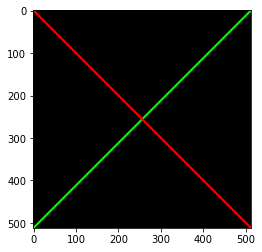

In [24]:
# Display a line in the image

img1 = np.zeros((512, 512, 3), np.uint8)           # returns a black image with color channels

#img1[:] = 0, 0, 255                                # blue image; img1[:] means the whole area
#img1[100:200, 200:300] = 255,0,0                   # red only in the  defined area


img2 = cv2.line(img1, (512,0), (0,512), (0,255,0), 3)       # integrates a line with  
                                                            # (start, end, color (green))

img3 = cv2.line(img2, (0,0), (img2.shape[1], img2.shape[0]), (255,0,0), 3)       # shape[0]: height, 
                                                                                 # shape[1]: width

plt.imshow(img3, cmap='gray')                                           
plt.show()  


#cv2.imshow("Image with lines", img3)                          
#cv2.waitKey(0)

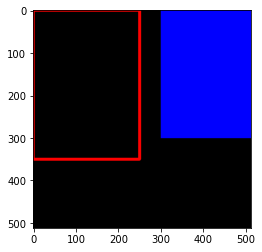

In [25]:
# Display a rectangle in the image

img1 = np.zeros((512, 512, 3), np.uint8)
img2 = cv2.rectangle(img1, (0,0), (250,350), (255,0,0), thickness = 5)                
img3 = cv2.rectangle(img2, (512,0), (300,300), (0,0,255), thickness = cv2.FILLED)      # rectangle full of color (cv2.FILLED or -1)
#img3 = cv2.rectangle(img2, (512,0), (img1.shape[1]//2,img1.shape[0]//2), (0,0,255), thickness = cv2.FILLED) 

plt.imshow(img3, cmap='gray')                                           
plt.show()  

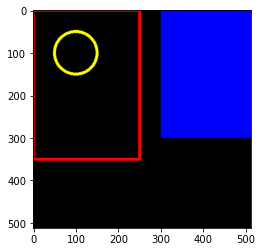

In [26]:
# Display a circle in the image

img4 = cv2.circle(img3, (100,100), 50, (255,255,0), 5)        # 50: radius; 5: thickness (-1: full color)

plt.imshow(img4, cmap='gray')                                           
plt.show()  

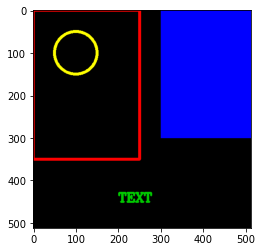

In [27]:
# Put text on the image

img5 = cv2.putText(img4, "TEXT", (200,450), cv2.FONT_HERSHEY_COMPLEX, 1, (0,200,0), 4)   # 1: scale, 
                                                                                         # 4: thickness
plt.imshow(img5, cmap='gray')                                           
plt.show()  

Number of faces: 1


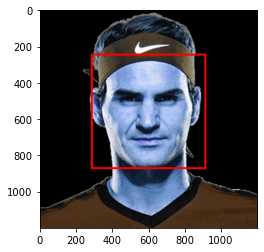

In [28]:
# Face Detection

# Download haarcascade_frontalface_default.xml on GitHub
path = r"C:\Users\user\Documents\opencv\data\haarcascades\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(path)

img = cv2.imread(r"C:\Users\user\Pictures\RF.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face = faceCascade.detectMultiScale(img_gray, 1.1, 4)

for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 10)         # bounding box around face; 10: thickness

    
print(f'Number of faces: {len(face)}')
plt.imshow(img)
plt.show()  

#cv2.imshow("Face", img)
#cv2.waitKey(0)

## Videos

In [ ]:
# Load video

vid = cv2.VideoCapture(r"C:\Users\user\Videos\test_video.mp4")

while True:
    success, img = vid.read()                       # success: bool-variable; a video is a sequence of images
    cv2.imshow("Video", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):           # break the loop and close it with q
        break

vid.release()
cv2.destroyAllWindows()

In [ ]:
# Rescale video

vid = cv2.VideoCapture(r"C:\Users\user\Videos\test_video.mp4")

def rescale(frame, scale=0.5):                     # for images, videos, live videos
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width, height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)


while True:
    success, img = vid.read()                       # success: was the image read in successfully
    img_resized = rescale(img)
    cv2.imshow("Video", img)
    cv2.imshow("Video Resized", img_resized)
    if cv2.waitKey(1) & 0xFF == ord('q'):           # break the loop and close it with q
        break

## Webcam

In [ ]:
# Using webcam

webcam = cv2.VideoCapture(0)                        # 0: default webcam if you have only one 
webcam.set(3, 640)                                  # (id, width)
webcam.set(4, 480)                                  # (id, height)
webcam.set(10, 100)                                 # (id, brightness)

while True:
    success, img = webcam.read()                    # success: bool-variable
    cv2.imshow("Video", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):           # break the loop and close it with q
        break